# Project-3 | Unsupervised Learning

### Mall Customer Segmentation using Clustering
- This project is a practice project after completing 100 days of ML from CampusX Youtube channel. To showcase the skills learned from that session.
- **Objective:** To segment customers into distinct groups based on their demographic information and spending behavior

### Dataset Summary
- **Dataset Name:** Mall Customer Segmentation Dataset
- **Source:** Kaggle
- **Problem Type:** Unsupervised Learning 

In [1]:
# importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('data.csv')

### 1. Understanding Dataset

In [3]:
# first 5 rows 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 2. Visulaization of dataset

Text(0.5, 1.0, 'Gender Distribution')

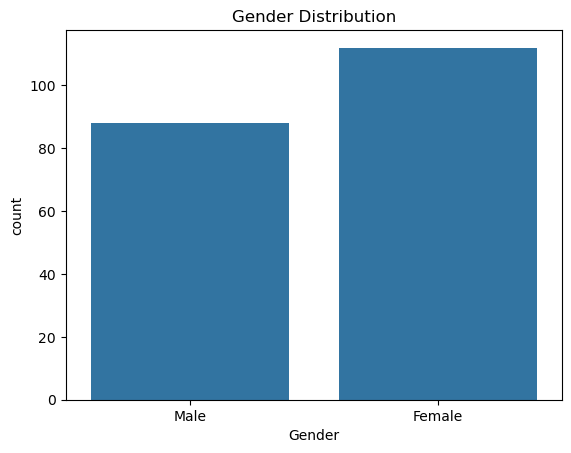

In [6]:
# gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Age vs Spending Score')

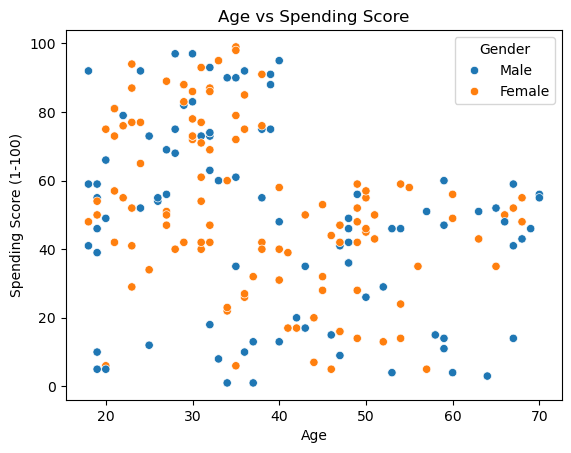

In [7]:
# age vs spending score
sns.scatterplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Age vs Spending Score")

Text(0.5, 1.0, 'Income vs Spending Score')

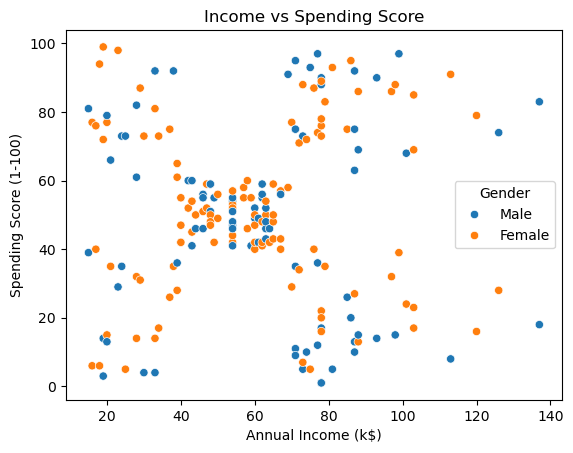

In [9]:
# annual income vs spending score
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue='Gender', data=df)
plt.title("Income vs Spending Score")

### 3. Data Preprocessing

In [10]:
# encode gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [11]:
# scale data
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]    # Select Features for Clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### 4. Applying multiple clustering technique

In [23]:
# importing required libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

**Using K-Means Clustering**

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0.5, 1.0, 'Elbow Method')

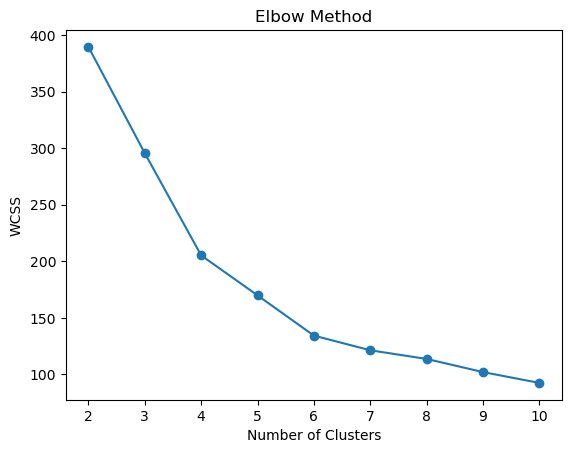

In [17]:
# elbow method
wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

In [18]:
# apply kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, df["KMeans_Cluster"])
print("Silhouette Score (KMeans):", sil_kmeans)

Silhouette Score (KMeans): 0.40846873777345605


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Using Hierarchical Clustering**

In [19]:
hc = AgglomerativeClustering(n_clusters=5)
df["Hierarchical_Cluster"] = hc.fit_predict(X_scaled)

sil_hc = silhouette_score(X_scaled, df["Hierarchical_Cluster"])
print("Silhouette Score (Hierarchical):", sil_hc)

Silhouette Score (Hierarchical): 0.39002826186267214


**Using DBSCAN**

In [21]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# ignore noise (-1) for silhouette
labels = df["DBSCAN_Cluster"]
if len(set(labels)) > 1:
    sil_dbscan = silhouette_score(X_scaled, labels)
    print("Silhouette Score (DBSCAN):", sil_dbscan)
else:
    print("DBSCAN produced single cluster")

Silhouette Score (DBSCAN): 0.2543987042290558


**Using Gaussian Mixture Model (GMM)**

In [22]:
gmm = GaussianMixture(n_components=5, random_state=42)
df["GMM_Cluster"] = gmm.fit_predict(X_scaled)

sil_gmm = silhouette_score(X_scaled, df["GMM_Cluster"])
print("Silhouette Score (GMM):", sil_gmm)

Silhouette Score (GMM): 0.37644074990819204


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 5. PCA for visualization

In [24]:
from sklearn.decomposition import PCA

In [25]:
# for 2D view
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

Text(0.5, 1.0, 'K-Means Clusters (PCA)')

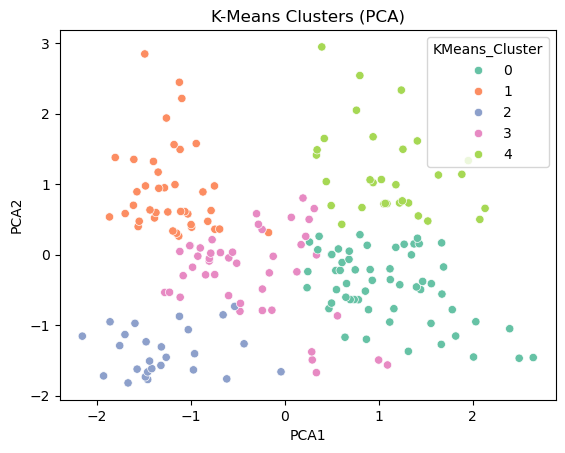

In [26]:
# PCA visulaization Kmeans
sns.scatterplot( x="PCA1", y="PCA2", hue="KMeans_Cluster", data=df, palette="Set2")
plt.title("K-Means Clusters (PCA)")

Text(0.5, 1.0, 'Hierarchical Clusters (PCA)')

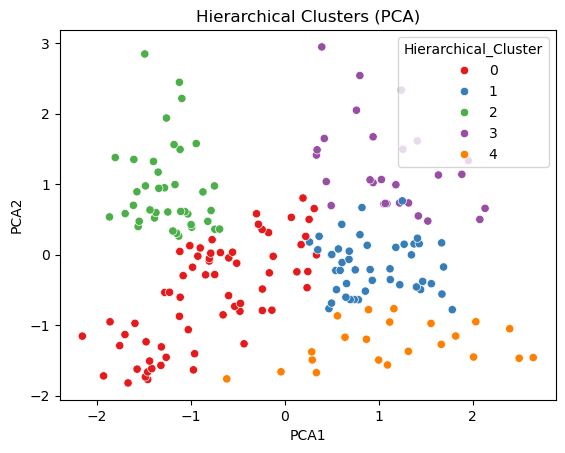

In [27]:
# PCA Visulaization Hierarchical
sns.scatterplot( x="PCA1", y="PCA2", hue="Hierarchical_Cluster", data=df, palette="Set1")
plt.title("Hierarchical Clusters (PCA)")

### 6. Model Comparison Summary

In [28]:
results = pd.DataFrame({
    "Algorithm": ["K-Means", "Hierarchical", "DBSCAN", "GMM"],
    "Silhouette Score": [
        sil_kmeans,
        sil_hc,
        sil_dbscan if 'sil_dbscan' in locals() else None,
        sil_gmm
    ]
})

results


,Algorithm,Silhouette Score
0,K-Means,0.408469
1,Hierarchical,0.390028
2,DBSCAN,0.254399
3,GMM,0.376441
